## 1. Gather

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import data
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

## 2. Assess

In [3]:
patients.head(3)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8


In [4]:
treatments.head(3)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN


In [5]:
adverse_reactions.head(3)

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia


In [6]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [7]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [8]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 896.0+ bytes


In [9]:
# check to see if we have duplicated columns
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]


14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [10]:
list(patients)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [11]:
# data when patients' addresses are unknown
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [12]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [13]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [14]:
patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
71,72,male,Leuco,Miranda,90 Meadow View Drive,Hartford,CT,6103.0,United States,860-515-0122LeucoMirandaNieto@teleworm.us,2/2/1976,184.8,72,25.1
448,449,male,Ivan,Fomin,632 Peaceful Lane,Garfield Heights,OH,44128.0,United States,216-502-3773IvanFomin@dayrep.com,6/10/1930,139.9,65,23.3
161,162,male,Mitsunobu,Fujiwara,212 Tibbs Avenue,Chester,MT,59522.0,United States,406-759-6160MitsunobuFujiwara@armyspy.com,5/21/1969,223.5,67,35.0
80,81,male,Eufemio,Rosario,2531 Cantebury Drive,Westbury,New York,11590.0,United States,EufemioRosarioAlarcon@gustr.com+1 (646) 621-0640,2/28/1923,183.7,71,25.6
254,255,male,Kang,Mai,1109 Beechwood Drive,Pittsburgh,PA,15205.0,United States,412-274-6756KangMai@jourrapide.com,9/16/1986,200.4,70,28.8


In [15]:
patients.surname.value_counts()

Doe              6
Taylor           3
Jakobsen         3
Batukayev        2
Liễu             2
Silva            2
Lund             2
Kadyrov          2
Parker           2
Nilsen           2
Correia          2
Collins          2
Woźniak          2
Gersten          2
Lâm              2
Hueber           2
Berg             2
Tạ               2
Tucker           2
Cabrera          2
Aranda           2
Cindrić          2
Kowalczyk        2
Ogochukwu        2
Bùi              2
Grímsdóttir      2
Schiavone        2
Dratchev         2
Lương            2
Johnson          2
                ..
Su               1
Richardson       1
Mortensen        1
Vieira           1
Hyypiä           1
Adamski          1
Bubanj           1
Zetticci         1
Gormanston       1
Bisliev          1
Debord           1
Mikkelsen        1
Scheltens        1
Tansey           1
Guðjónsdóttir    1
Thạch            1
Amanuel          1
Grabljevec       1
Oates            1
Ghanem           1
Navrátil         1
Amari       

In [16]:
patients.address.value_counts()

123 Main Street             6
2476 Fulton Street          2
2778 North Avenue           2
648 Old Dear Lane           2
2235 Catherine Drive        1
1742 Tea Berry Lane         1
3662 Shinn Street           1
510 Berry Street            1
3094 Oral Lake Road         1
2924 Stanley Avenue         1
2043 Jadewood Drive         1
2418 Smith Street           1
2531 Eastland Avenue        1
260 Derek Drive             1
3820 Terry Lane             1
1965 Crestview Manor        1
4571 Walnut Hill Drive      1
677 Broad Street            1
1753 Sherman Street         1
3391 Marcus Street          1
1324 Duffy Street           1
1808 Stuart Street          1
1033 Wayside Lane           1
2935 Diamond Cove           1
1072 Bird Spring Lane       1
3418 Tyler Avenue           1
1094 Jones Avenue           1
4649 Worley Avenue          1
994 Hill Croft Farm Road    1
2784 Turkey Pen Road        1
                           ..
36 Heather Sees Way         1
2886 Straford Park          1
4018 Popla

In [17]:
# data when addresses are duplicated
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [18]:
# check the patients weights
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
51     107.1
270    108.1
198    108.5
48     109.1
478    109.6
141    110.2
38     111.8
438    112.0
14     112.0
235    112.2
307    112.4
191    112.6
408    113.1
49     113.3
326    114.0
338    114.1
253    117.0
321    118.4
168    118.8
1      118.8
350    119.0
207    119.2
265    120.0
341    120.3
       ...  
332    224.0
252    224.2
12     224.2
222    224.8
166    225.3
111    225.9
101    226.2
150    226.6
352    227.7
428    227.7
88     227.7
13     228.4
339    229.0
182    230.3
121    230.8
257    231.7
395    231.9
246    232.1
219    237.8
11     238.7
50     238.9
441    239.1
499    239.6
439    242.0
487    242.4
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

#### There is a person who weights 48.8 lbs.  This is not correct. We need to check that.  The weight is in kg instead of lbs, so we need to change it to lbs

In [19]:
patients[patients.weight == 48.8]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [20]:
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [21]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

In [22]:
# check if we have nan value in auralin column
sum(treatments.auralin.isnull())

0

In [23]:
# check if we have nan value in novodra column
sum(treatments.novodra.isnull())

0

### Quality

After accessing and understanding the dataset, here are the list we should clean the data:

##### `patients` table
- Zip code is a float not a string
- Zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns) ***(can't clean)***
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

##### `treatments` table
- Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

##### `adverse_reactions` table
- Lowercase given names and surnames

#### Tidiness
- Contact column in `patients` table should be split into phone number and email
- Three variables in two columns in `treatments` table (treatment, start dose and end dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

## 3. Clean

In [24]:
# make copies of the dataset
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Missing Data

We have missing data for treatments table.  Fortunately, we have missing data in a file called: treatments_cut.csv.  We are going to read the file and combine it with the one we have.

In [25]:
# read the extra file
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_cut.head(3)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN


In [26]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [27]:
treatments_clean = pd.DataFrame(treatments_clean)

In [28]:
treatments_cut = pd.DataFrame(treatments_cut)

In [29]:
treatments_clean.head(3)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN


In [30]:
treatments_cut.head(3)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,jožka,resanovič,22u - 30u,-,7.56,7.22,0.34
1,inunnguaq,heilmann,57u - 67u,-,7.85,7.45,NaN
2,alwin,svensson,36u - 39u,-,7.78,7.34,NaN


In [31]:
# we will combine the data here
frames = [treatments_clean,treatments_cut]
treatments_clean = pd.concat(frames, ignore_index=True)

##### Test

In [32]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
given_name      350 non-null object
surname         350 non-null object
auralin         350 non-null object
novodra         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    213 non-null float64
dtypes: float64(3), object(4)
memory usage: 19.2+ KB


In [33]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [34]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


### Treatments table has missing HbA1c_change value, so we need to update that column by find the difference between hba1c_start and hba1c_end

In [35]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
given_name      350 non-null object
surname         350 non-null object
auralin         350 non-null object
novodra         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    213 non-null float64
dtypes: float64(3), object(4)
memory usage: 19.2+ KB


In [36]:
treatments_clean.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
41,mahmud,kadyrov,-,44u - 43u,7.53,7.11,0.92
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN
221,torben,mortensen,-,44u - 40u,7.80,7.40,0.90
32,laura,ehrlichmann,-,43u - 40u,7.95,7.46,0.99
195,minea,lindgren,38u - 45u,-,9.45,8.94,NaN


In [37]:
treatments_clean.hba1c_change = treatments_clean.hba1c_start - treatments_clean.hba1c_end

##### Test

In [38]:
treatments_clean.sample(15)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
314,adlan,shishani,-,43u - 40u,7.84,7.37,0.47
80,hideki,haraguchi,-,37u - 35u,7.59,7.05,0.54
239,linda,lundy,-,48u - 53u,7.97,7.52,0.45
245,wu,sung,-,47u - 48u,7.61,7.12,0.49
155,russom,amanuel,-,39u - 36u,7.86,7.40,0.46
261,caroline,shuler,-,50u - 54u,7.63,7.27,0.36
229,sandra,taylor,51u - 58u,-,7.84,7.49,0.35
17,gina,cain,-,36u - 36u,7.88,7.40,0.48
111,mevla,grabljevec,-,51u - 55u,7.72,7.44,0.28
7,eddie,archer,31u - 38u,-,7.89,7.55,0.34


### Create phone_number and email column from contact column by extracting data

##### Code

In [39]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

# Note: axis=1 denotes that we are referring to a column, not a row
patients_clean = patients_clean.drop('contact', axis=1)

##### Test

In [40]:
# Confirm contact column is gone
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [41]:
patients_clean.phone_number.sample(15)

169         302-474-8075
243         715-817-0134
46          724-419-3583
481         918 706 2776
126         508-739-5632
90     +1 (585) 902-9127
225         202-485-6607
51          309 912 9553
91          713-230-1739
25          505-828-4955
31          423-538-4887
104         602 265 7408
267    +1 (785) 823-6728
33          815-270-7770
390         979-639-7844
Name: phone_number, dtype: object

In [42]:
patients_clean.email.sample(15)

495           HajimeTsukada@dayrep.com
475         MalikVaneker@superrito.com
28              RobertWolf@fleckens.hu
109    StephenFMayberry@jourrapide.com
90            IngoRokavc@superrito.com
372       MiloslawWisniewski@rhyta.com
248        CecilieNilsen@superrito.com
351               NileMehari@gustr.com
15                 SrenFLund@gustr.com
57        SiebrigjeKoldenhof@rhyta.com
208        GabrieleSaenger@armyspy.com
395         BakosKrisztian@teleworm.us
457        MevlaGrabljevec@teleworm.us
105              NateBowden@einrot.com
24           JakobCJakobsen@einrot.com
Name: email, dtype: object

In [43]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

### There are three variables in two columns in `treatments` table (auralin and novodra), we need to transform these 2 columns.

##### Code

In [44]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [45]:
treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-


In [46]:
# remove all rows with dose = '-'
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


In [47]:
# Create extra columns for values in dose column
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u,30u,36u


In [48]:
# drop the dose column
treatments_clean = treatments_clean.drop('dose', axis=1)

##### Test

In [49]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


### Add Adverse reaction to the `treatments` table

##### Code

In [50]:
# Merging adverse_reactions_clean table to treatments_clean table on given_name and surname
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                            on=['given_name', 'surname'], how='left')

##### Test

In [51]:
treatments_clean.head(3)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN


### Replacing given_name and surname column by patient_id column in treatments table.

##### Code

In [52]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
phone_number    491 non-null object
email           491 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 59.0+ KB


In [53]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 9 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change        350 non-null float64
treatment           350 non-null object
dose_start          350 non-null object
dose_end            350 non-null object
adverse_reaction    35 non-null object
dtypes: float64(3), object(6)
memory usage: 27.3+ KB


In [54]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [55]:
id_names.head()

,patient_id,given_name,surname
0,1,zoe,wellish
1,2,pamela,hill
2,3,jae,debord
3,4,liêm,phan
4,5,tim,neudorf


##### Test

In [56]:
# Confirm the merge was executed correctly
treatments_clean.head(3)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345


In [57]:
# Patient ID should be the only duplicate column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

### Quality

##### Define
#### We need to fix the zip_code column. Zip code is now a float not a string and Zip code has four digits sometimes

##### Code

In [59]:
patients_clean.head(3)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,7/10/1976,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,4/3/1967,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,2/19/1980,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com


In [60]:
# remove ".0" at the end and add 0 at the beginning of zipcode to get to 5 numbers
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5,fillchar = '0')

In [61]:
patients_clean.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
435,436,female,Ivana,Kašná,3343 Jefferson Street,Newport News,VA,23601,United States,8/15/1995,173.8,67,27.2,+1 (757) 736-7026,IvanaKasna@teleworm.us
482,483,male,Diogo,Souza,4033 White Avenue,Corpus Christi,TX,78401,United States,3/3/1945,220.0,65,36.6,361-693-4960,DiogoBarrosSouza@jourrapide.com
384,385,male,Even,Knutsen,4851 Andy Street,Custer,SD,57730,United States,10/26/1972,180.2,74,23.1,+1 (605) 440-5492,EvenKnutsen@rhyta.com
96,97,female,Nasim,Salib,3161 Fantages Way,Presque Isle,ME,04769,United States,7/30/1971,211.4,65,35.2,207-768-0477,NasimSumaiyaSalib@einrot.com
197,198,male,Thể,Lương,2403 Ripple Street,Gaylord,MI,49735,United States,11/15/1967,223.1,70,32.0,989 705 7690,LuongKhacThe@dayrep.com


In [62]:
patients_clean.zip_code = patients_clean.zip_code.replace('000n',np.nan)

##### Test

In [63]:
patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

#### Correct the value for Tim Neudorf height.  It should be 72 in

##### Code

In [64]:
patients_clean.height = patients_clean.height.replace(27,72)

##### Test

In [65]:
patients_clean[patients_clean.patient_id == 5].height

4    72
Name: height, dtype: int64

In [66]:
# should be no record 
patients_clean[patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


### Correct the State column.The problem is full state names sometimes, abbreviations other times.  We are going to change all to abbreviations.

##### Code

In [67]:
state_abbrev = {'California':'CA',
                'New York':'NY',
                'Illinois':'IL',
                'Florida':'FL',
                'Nebraska':'NE'}
# function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis = 1)

##### Test

In [68]:
# checking the result
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
LA    13
OK    13
NJ    12
VA    11
WI    10
MS    10
AL     9
IN     9
TN     9
MN     9
KY     8
WA     8
NC     8
MO     7
NV     6
KS     6
NE     6
ID     6
IA     5
CT     5
SC     5
AZ     4
ME     4
ND     4
CO     4
RI     4
AR     4
SD     3
OR     3
MD     3
WV     3
DE     3
VT     2
MT     2
DC     2
NM     1
NH     1
WY     1
AK     1
Name: state, dtype: int64

### Change the name: Dsvid Gustafsson to David Gustafsson

##### Code

In [69]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid','David')

##### Test

In [70]:
# Checking
patients_clean[patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


### Correct datatype:
* Assigned_sex, state, zip_code to category
* birthdate : datetime
* fixing auralin and novodra column
* remove the letter 'u' in doses for Auralin and Novodra

##### Code

In [71]:

# To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# to datetime
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)


##### Test

In [72]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null category
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null category
zip_code        503 non-null object
country         491 non-null object
birthdate       503 non-null datetime64[ns]
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
phone_number    491 non-null object
email           491 non-null object
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 53.9+ KB


In [73]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
hba1c_start         349 non-null float64
hba1c_end           349 non-null float64
hba1c_change        349 non-null float64
treatment           349 non-null object
dose_start          349 non-null int64
dose_end            349 non-null int64
adverse_reaction    35 non-null object
patient_id          349 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


#### Multiple phone number formats (make all them 11 digit)

##### Code

In [74]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11,fillchar = '1') 

##### Test

In [75]:
patients_clean.phone_number.head()

0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

### Remove John Doe data

##### Code

In [76]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

##### Test

In [77]:
patients_clean.surname.value_counts()

Taylor           3
Jakobsen         3
Batukayev        2
Lương            2
Silva            2
Lund             2
Kadyrov          2
Parker           2
Nilsen           2
Correia          2
Collins          2
Woźniak          2
Gersten          2
Lâm              2
Liễu             2
Hueber           2
Tạ               2
Tucker           2
Cabrera          2
Aranda           2
Cindrić          2
Kowalczyk        2
Ogochukwu        2
Bùi              2
Grímsdóttir      2
Schiavone        2
Dratchev         2
Berg             2
Johnson          2
Souza            2
                ..
Zaitseva         1
Endrizzi         1
Richardson       1
Bubanj           1
Oates            1
Zetticci         1
Gormanston       1
Bisliev          1
Debord           1
Mikkelsen        1
Scheltens        1
Tansey           1
Guðjónsdóttir    1
Thạch            1
Hyypiä           1
Amanuel          1
Ghanem           1
Hori             1
Navrátil         1
Amari            1
Azuma            1
Afanasyeva  

#### Multiple records for Jakobsen, Gersten, Taylor

##### Code

In [78]:
patients_clean = patients_clean[~(patients_clean.address.duplicated())&(patients_clean.address.notnull())]

##### Test

In [79]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [80]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [81]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


### Change Zaitseva weight from kgs to lbs

##### Code

In [82]:
weight_kg = patients_clean.weight.sort_values()[0]
mask = patients_clean.surname == 'Zaitseva'
column_name = 'weight'
patients_clean.loc[mask,column_name] = weight_kg * 2.20462

##### Test

In [83]:
# Your testing code here
patients_clean.weight.sort_values()

459    102.100000
335    102.700000
74     103.200000
317    106.000000
171    106.500000
51     107.100000
270    108.100000
198    108.500000
48     109.100000
478    109.600000
141    110.200000
38     111.800000
14     112.000000
438    112.000000
235    112.200000
307    112.400000
191    112.600000
408    113.100000
49     113.300000
326    114.000000
338    114.100000
253    117.000000
321    118.400000
168    118.800000
1      118.800000
350    119.000000
207    119.200000
265    120.000000
341    120.300000
208    121.200000
          ...    
21     223.700000
332    224.000000
12     224.200000
252    224.200000
222    224.800000
166    225.300000
111    225.900000
101    226.200000
150    226.600000
428    227.700000
352    227.700000
88     227.700000
13     228.400000
339    229.000000
182    230.300000
121    230.800000
395    231.900000
246    232.100000
11     238.700000
50     238.900000
441    239.100000
499    239.600000
439    242.000000
487    242.400000
144    244

# MY EXPLORATION

In [84]:
treatments_clean.sample(5)

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
302,9.27,8.77,0.50,novodra,40,39,NaN,158
306,7.64,7.33,0.31,novodra,31,31,NaN,405
346,9.21,8.80,0.41,novodra,22,23,injection site discomfort,336
329,7.79,7.45,0.34,novodra,30,27,NaN,363
60,7.76,7.40,0.36,auralin,63,68,NaN,183


In [85]:
treatments_clean.adverse_reaction.value_counts()

hypoglycemia                 20
injection site discomfort     6
headache                      3
cough                         2
nausea                        2
throat irritation             2
Name: adverse_reaction, dtype: int64

In [86]:
treatments_clean.treatment.value_counts()

auralin    175
novodra    174
Name: treatment, dtype: int64

In [87]:
auralin = treatments_clean[treatments_clean['treatment'] == 'auralin']
auralin.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15


In [88]:
auralin.adverse_reaction.value_counts()

hypoglycemia         10
throat irritation     2
headache              1
cough                 1
nausea                1
Name: adverse_reaction, dtype: int64

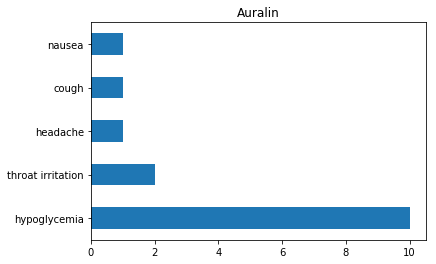

In [89]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline 
auralin.adverse_reaction.value_counts().plot(kind = 'barh', title = 'Auralin')

**We see that hypoglycemia happens the most when taking Auralin.  Other reactions are headache, cough, nausea,and throat irritation. **

In [90]:
novodra = treatments_clean[treatments_clean['treatment'] == 'novodra']
novodra.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
175,7.56,7.09,0.47,novodra,40,45,hypoglycemia,94
176,7.68,7.25,0.43,novodra,39,36,NaN,64
177,7.78,7.46,0.32,novodra,33,29,NaN,57
178,7.56,7.18,0.38,novodra,42,44,hypoglycemia,490
179,8.08,7.70,0.38,novodra,54,54,NaN,349


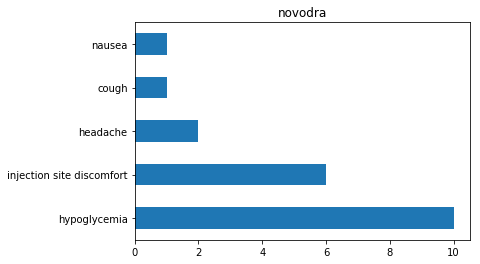

In [91]:
novodra.adverse_reaction.value_counts().plot(kind = 'barh', title = 'novodra')

**Hypoglycemia also happens the most with Novodra.  However, Novodra causes injection site discomfort which does not happen with Auralin.  Other reactions are cough, nausea, and headache.**

In [92]:
after_mean = treatments_clean[['treatment','dose_start','dose_end']]
after_mean.head()

,treatment,dose_start,dose_end
0,auralin,41,48
1,auralin,33,36
2,auralin,37,42
3,auralin,31,38
4,auralin,30,36


In [93]:
after_mean['dose_change'] = (after_mean.dose_start - after_mean.dose_end)
after_mean.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,treatment,dose_start,dose_end,dose_change
0,auralin,41,48,-7
1,auralin,33,36,-3
2,auralin,37,42,-5
3,auralin,31,38,-7
4,auralin,30,36,-6


In [94]:
after_mean.groupby(['treatment']).mean()

,dose_start,dose_end,dose_change
treatment,,,
auralin,39.022857,47.348571,-8.325714
novodra,39.155172,38.770115,0.385057


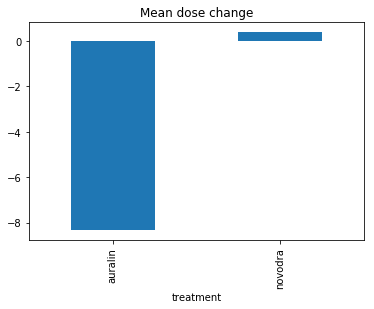

In [95]:
after_mean.groupby(['treatment']).mean()['dose_change'].plot(kind = 'bar', title = 'Mean dose change')

Looking at the graph above, we see auralin's dose_change mean is -8.32 and novodra's dose_change mean is 0.38.  In Auralin case, we see the mean is a negative number.  It means the dose_start is less than dose_end.  Patients have to take more medicine.  We can say the dose increase, and patients will pay more to get extra doses.  However, the reaction with Auralin is not severe as with Novodra.
In Novodra case, the mean is 0.38.  It means dose_start is greater than dose_end.  The patients take less medicine as they go.  